Plot climate_var data over Germany. 

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.util as cutil
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from netCDF4 import Dataset

Set spatial and temporal extend.

In [18]:
timesteps = 1
start_lon = 0
end_lon = 1440
start_lat = 0
end_lat = 721

Load .nc-file and save the relevant variables. This makes rendering much faster when the nc-file is large. In this example, you can skip this part and continue with the next cell which load the pickle files. 

Load the pickle-files. 

In [19]:
filename = "./future-scenarios/new/SSP1-1.9_adaptor.esgf_wps.retrieve-1683660431.0402071-3857-21-ea2837a2-cb74-412f-a840-b5ac29c5a2cb/sfcWind_Amon_IPSL-CM6A-LR_ssp119_r1i1p1f1_gr_21000716-21000716_v20190410.nc"

data = Dataset(filename)

print(data.variables)
climate_var = data.variables["sfcWind"][:]
climate_var = climate_var[0:timesteps, start_lat:end_lat,start_lon:end_lon].flatten()

print(len(data.variables["lon"][:]))

lons = data.variables["lon"][start_lon:end_lon]
lons = np.array(lons[:])


lats = data.variables["lat"][:][start_lat:end_lat]

climate_var = np.array(climate_var).reshape(timesteps,len(lats),len(lons) )



{'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    axis: Y
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (143,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    axis: X
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'height': <class 'netCDF4._netCDF4.Variable'>
float64 height()
    name: height
    standard_name: height
    long_name: height
    units: m
    axis: Z
    positive: up
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    standard_name: time
    long_name: Time axis
    time_origin: 2015-01-01 00:00:00
    bounds: time_bounds
    units: days since 201

Generate the plot. 

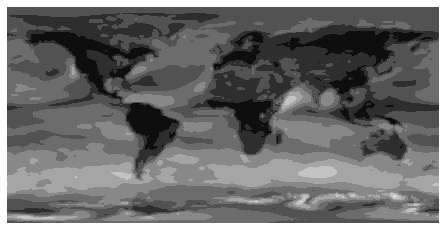

In [20]:
%matplotlib inline
from IPython.display import clear_output
import os
import time
from cartopy.util import add_cyclic_point

cmap = mpl.colormaps["Greys_r"]

scale_factor = 0.0003120164276888396
offset = 10.552331245928917

# Get the current time as a formatted string
timestamp = time.strftime("%Y%m%d_%H%M%S")

# Specify the name of the new directory with the timestamp
new_dir = "./output/" + timestamp

# Create the new directory
os.mkdir(new_dir)

steps = 1



for i in np.arange(0, timesteps, step = steps):
    print("processing {}%".format(round(100*i/(timesteps/steps),2)))
    data = climate_var[i]
    print(lons.flatten())
    # print(lons.reshape(-1).shape)

    print(lons)

    dataFilled, lonsFilled = add_cyclic_point(data, coord = lons)
    print(lonsFilled)
    LONS, LATS = np.meshgrid(lonsFilled,lats)
    
    # set the axes' spatial projection, styling, and title
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.axis("off")
    
    plt.contourf(
        LONS,
        LATS,
        dataFilled,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
        vmin = 0,
        vmax = 10
    )
    plt.tight_layout()
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
    plt.savefig("{}/ssp1_1_9_img_frame_{}.jpg".format(new_dir, i), dpi=600)
    clear_output(wait = True)
    plt.pause(0.001)

